In [5]:
import csv
import datetime as dt
import matplotlib.pyplot as plt

encoding = 'utf-8'

# Animeji, ki vložijo več časa v produkcijo epizod, imajo na koncu boljšo oceno.
with open(file="anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    time_per_ep = []
    ratings = []
    for i, line in enumerate(reader):
        if i == 0:
            continue # Spusti prvo vrstico.

        score = line[1]
        n_episodes = line[6]
        start_date = line[23]
        end_date = line[24]

        if start_date == 'N/A' or end_date == 'N/A':
            continue

        fmt = "%b %d, %Y"

        # Pridobi datum iz stringa v formatu: (Mes dan, leto), kjer je mesec 3 črke.
        start_date = dt.datetime.strptime(start_date, fmt)
        end_date   = dt.datetime.strptime(end_date, fmt)

        duration = (end_date - start_date).days # Dolžina v dnevih

        time_per_ep.append(duration/int(n_episodes))
        ratings.append(score)
    
# plt je knjižnica za risanje grafov
plt.scatter(ratings[::-1], time_per_ep[::-1]) # Rating od min do maks
plt.ylabel("Days per episode")
plt.xlabel("Rating")
plt.title("Anime rating vs. time per episode")
# TODO: Popravi axis numbers
plt.show() # Da ga vidmo



IndexError: list index out of range

Hipoteza je bila ovžena. /(˙^˙)\

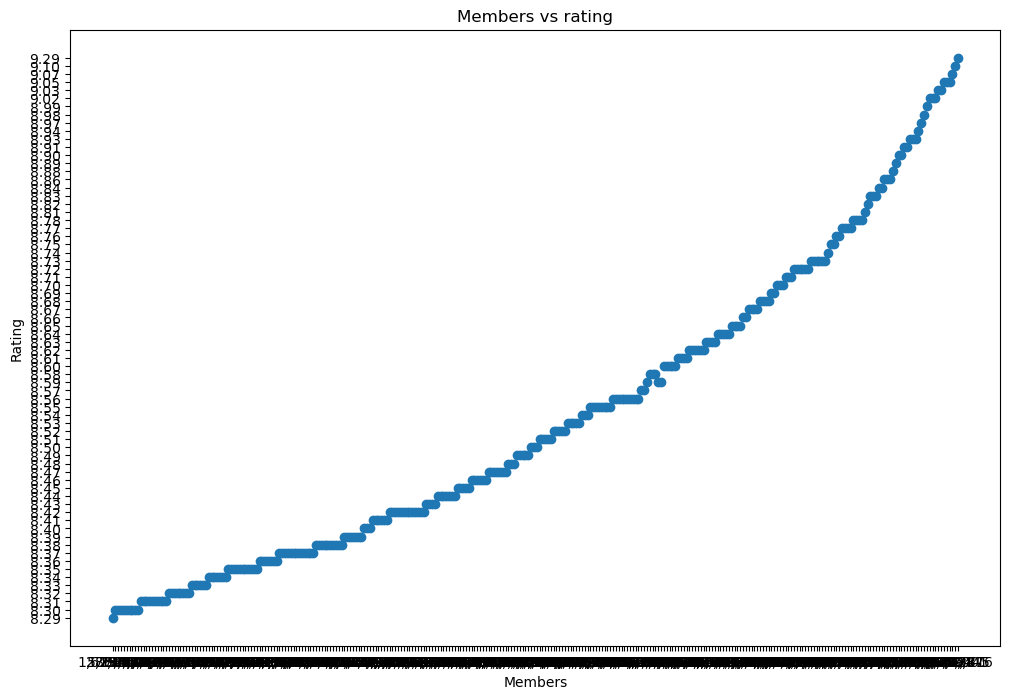

In [6]:
# Več memberjev pomeni večjo oceno:
 
with open(file="anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    members = []
    scores = []
    for i, line in enumerate(reader):
        if i == 0:
            continue # Spusti prvo vrstico.

        score = line[1]
        n_memebers = line[21]

        members.append(n_memebers)
        scores.append(score)
    
# plt je knjižnica za risanje grafov
plt.figure(figsize=(12, 8))
plt.scatter(members[::-1], scores[::-1]) # Rating od min do maks
plt.xlabel("Members")
plt.ylabel("Rating")
plt.title("Members vs rating")

plt.show() # Da ga vidmo



Hipoteza je bila potjena. Ugotovili smo, da imajo anime-ji z boljšo oceno več gledalcev.

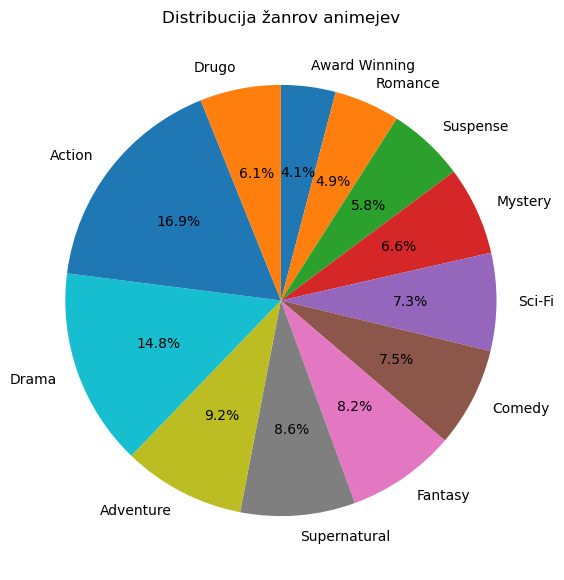

In [ ]:
import csv
import matplotlib.pyplot as plt

encoding = "utf-8"

zanra_stevilo = {}

with open("anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    for i, line in enumerate(reader):
        if i == 0:
            continue  # skip header row

        # take the genre column (adjust index if needed!)
        genres = line[16]   # e.g. "Action, Drama, Suspense"
        genres = genres.strip("[]")


        # split into individual genres
        for g in genres.split(", "):
            if g.strip() == "" or g == "N/A":
                continue

            g = g.strip("'") # Da bo lepo :)

            if g not in zanra_stevilo.keys():
                zanra_stevilo[g] = 1
            else:
                zanra_stevilo[g] += 1

# Razvrsti po vrednosti (naraščajoče)
# https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
zanra_stevilo = {k: v for k, v in sorted(zanra_stevilo.items(), key=lambda item: item[1])}
meja = 4  # prag v %

labels = []
vrednosti = []

sum_vrednosti = sum(zanra_stevilo.values())
others_vrednost = 0

for label, value in zanra_stevilo.items():
    procent = 100 * value / sum_vrednosti
    if procent >= meja:
        labels.append(label)
        vrednosti.append(value)
    else:
        others_vrednost += value

# Dodaj "Others" samo, če je potrebno
if others_vrednost > 0:
    labels.append("Drugo")
    vrednosti.append(others_vrednost)


# Risanje pite
plt.figure(figsize=(7,7)) # Popravimo velikost torte
plt.pie(
    vrednosti,
    labels=labels,
    autopct="%1.1f%%", # TODO: Razišči
    startangle=90,
    counterclock=False
)
plt.title("Distribucija žanrov animejev")
plt.show()



Vidimo, da je žanra action(slo. akcija) najbolj popularna.
Sledijo si:
- Action
- Drama
- Adventure
- Supernatural
- Fantasy

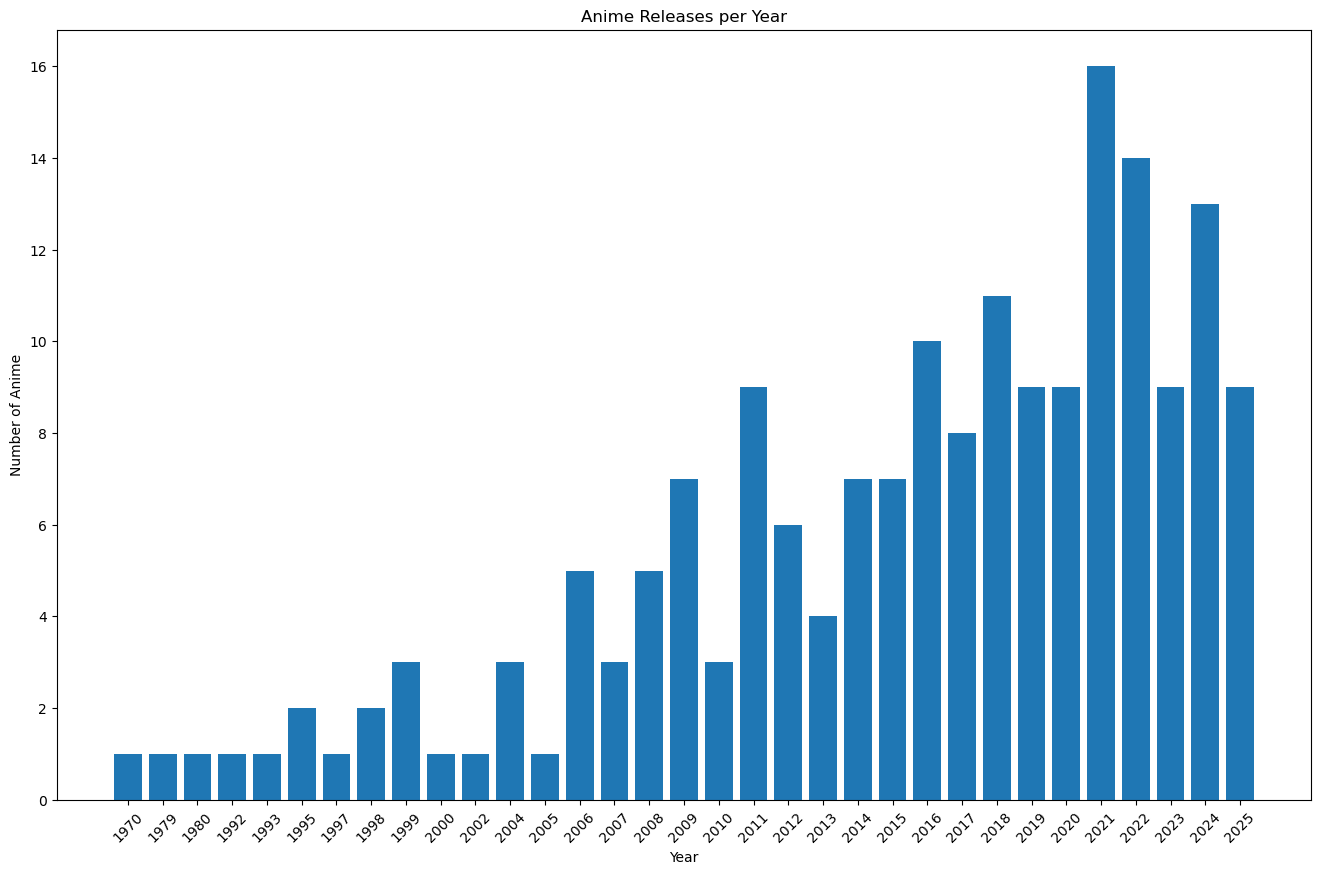

In [52]:
# Anime po letih
import re
import csv

encoding = 'utf-8'

with open(file="anime_data_premium.csv", mode="r", encoding=encoding) as podatki:
    reader = csv.reader(podatki)
    leta = {}
    for i, line in enumerate(reader):
        if i == 0:
            continue # Spusti prvo vrstico.
        
        podatek = line[10]
        leto = re.search(r"\b(\d{4})\b", podatek)
        if leto:
            leto = leto.group(1)

        if leto == 'N/A' or leto == None:
            continue

        if leto not in leta.keys():
            leta[leto] = 1
        else:
            leta[leto] += 1
            
# Razporedimo leta naraščajoče
years = sorted(leta.keys(), key=int)
counts = [leta[y] for y in years]

plt.figure(figsize=(16.18, 10))
plt.bar(years, counts)
plt.xlabel("Year")
plt.ylabel("Number of Anime")
plt.title("Anime Releases per Year")
plt.xticks(rotation=45)  # Da se ne prekrivajo
plt.show()